In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()


# Anzeige für Dataframes

pd.set_option('display.max_rows', 2500)          # Reihen
pd.set_option('display.max_columns', 100)        # Spalten
pd.set_option('display.width', None)             # Breite der Anzeige in Zeichen
pd.set_option('display.max_colwidth', 100)       # maximale Breite einer Spalte
pd.set_option("display.precision", 2)            # für Dezimalstellen

In [2]:
df = pd.read_csv("marketing_campaign.csv",delimiter="\t")

In [3]:
# Dataframe für Visualisierungen mit noch kategorischen Werten

df_visual = pd.read_csv("marketing_campaign.csv",delimiter="\t")

In [4]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
# UMWANDELN KATEGORISCHE FEATURES

In [12]:

def mari(x):
    if x == "Absurd" or x == "YOLO" or x == "Alone":
        return 0
    if x == "Single":
        return 1
    if x == "Widow":
        return 2
    if x == "Divorced":
        return 3
    if x == "Together":
        return 4
    if x == "Married":
        return 5
    
df["Marital_Status"] = df["Marital_Status"].apply(mari)


In [13]:

def educ(x):
    if x == "Basic":
        return 0
    if x == "Graduation":
        return 1
    if x == "2n Cycle":
        return 2
    if x == "Master":
        return 3
    if x == "PhD":
        return 4
    
df["Education"] = df["Education"].apply(educ)


In [14]:
# FÜLLEN NULLWERTE MIT MEAN BEI INCOME

df["Income"].fillna(df["Income"].mean(),inplace=True)

df_visual["Income"].fillna(df_visual["Income"].mean(),inplace=True)

In [15]:
# SPALTE AGE HINZUFÜGEN UND SPALTE YEAR_BIRTH LÖSCHEN

df["Age"] = 2023 - df["Year_Birth"]

df.drop("Year_Birth", axis = 1, inplace = True)


df_visual["Age"] = 2023 - df_visual["Year_Birth"]

df_visual.drop("Year_Birth", axis = 1, inplace = True)

In [16]:
df.shape

(2240, 29)

In [17]:
# Ausreißer bei Age

df[df["Age"]  > 100]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,2,3,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,123
239,11004,2,1,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,130
339,1150,4,4,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,124


In [18]:
def ausreisser_age(x):
    if x > 100:
        return 54
    else:
        return x
    
df['Age'] = df['Age'].apply(ausreisser_age)

df_visual['Age'] = df_visual['Age'].apply(ausreisser_age)

df[df["Income"]  > 150000]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
164,8475,4,5,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,50
617,1503,4,4,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0,47
655,5555,1,3,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,48
687,1501,4,5,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,41
1300,5336,3,4,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0,52
1653,4931,1,4,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,46
2132,11181,4,5,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,74
2233,9432,1,4,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,46


In [19]:
# NEUE SPALTE TOTAL_CAMPAIGNS_ACCEPTED 

df['AcceptedCmp_Total'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
'AcceptedCmp5', 'Response']].sum(axis=1)

df_visual['AcceptedCmp_Total'] = df_visual[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
'AcceptedCmp5', 'Response']].sum(axis=1)

In [20]:
df['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [21]:
df.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AcceptedCmp_Total
0,5524,1,1,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,1
1,2174,1,1,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,0


In [22]:
# Löschen irrelevanter Spalten ID, Dt_Customer, Z_CostContact und Z_Revenue


df.drop(["ID","Dt_Customer", "Z_CostContact", "Z_Revenue"],axis=1, inplace = True)


#df_visual.drop(["ID","Dt_Customer", "Z_CostContact", "Z_Revenue"],axis=1, inplace = True)

In [23]:
df.shape

(2240, 26)

In [24]:
# Ausreißer bei Income

df[df["Income"]  > 150000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AcceptedCmp_Total
164,4,5,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,50,0
617,4,4,162397.0,1,1,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,47,0
655,1,3,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,48,0
687,4,5,160803.0,0,0,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,41,0
1300,3,4,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,52,0
1653,1,4,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,46,0
2132,4,5,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,74,0
2233,1,4,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,46,0


In [25]:
# AUSREISSER BEI INCOME (7 ZEILEN) MIT FUNKTION NEU BEFÜLLEN

def income_ausreisser(x):
    if x > 150000:
        return 52000
    else:
        return x
    
df['Income'] = df['Income'].apply(income_ausreisser)

df_visual['Income'] = df_visual['Income'].apply(income_ausreisser)

df[df["Income"]  > 150000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AcceptedCmp_Total


In [26]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AcceptedCmp_Total
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2.24e+03,2240.00,2240.00,2240.00
mean,2.05,3.56,51641.52,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,9.37e-03,0.15,54.10,0.45
std,1.28,1.55,20564.93,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,9.64e-02,0.36,11.69,0.89
min,0.00,0.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,27.00,0.00
25%,1.00,2.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,46.00,0.00
50%,1.00,4.00,51741.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,53.00,0.00
75%,3.00,5.00,68098.25,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,64.00,1.00
max,4.00,5.00,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,83.00,5.00


In [27]:
df.nunique()

Education                 5
Marital_Status            6
Income                 1968
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Age                      56
AcceptedCmp_Total         6
dtype: int64

In [26]:
# Dataframe exportieren für Visualisierungen in Tableau
#df_visual.to_csv("marketing_campaign_visualisierung.csv",index=False)

# KORRELATIONEN

<Axes: >

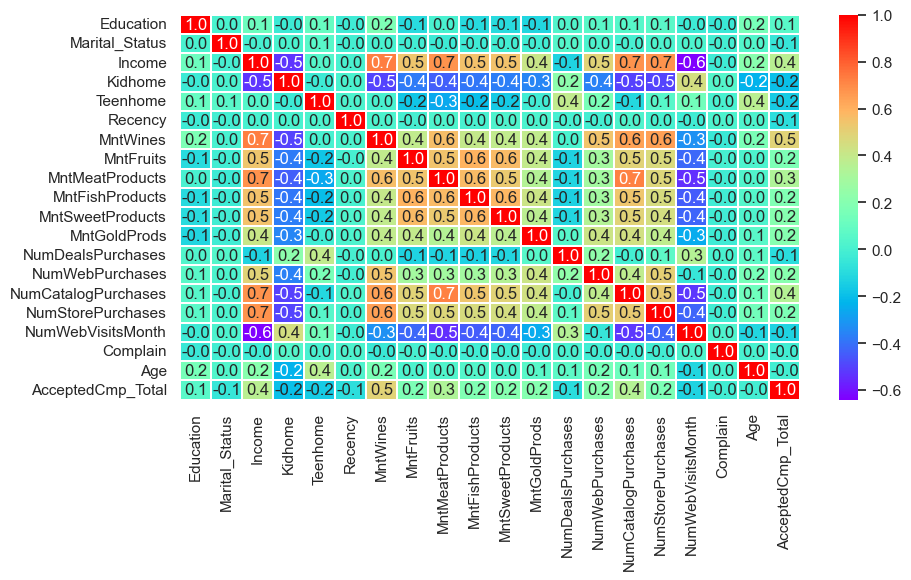

In [34]:
plt.figure(figsize=(10,))
sns.heatmap(df.drop(["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"],
                      axis=1).corr(),cmap="rainbow",linewidths=0.1,fmt=".1f",annot=True)

In [36]:
corr = df.corr()[["Response"]]. round(2).sort_values(by = ["Response"], 
       ascending = False).drop(["Response"]).reset_index()

corr

,index,Response
0,AcceptedCmp_Total,0.72
1,AcceptedCmp5,0.33
2,AcceptedCmp1,0.29
3,MntWines,0.25
4,AcceptedCmp3,0.25
5,MntMeatProducts,0.24
6,NumCatalogPurchases,0.22
7,AcceptedCmp4,0.18
8,Income,0.17
9,AcceptedCmp2,0.17


In [104]:
#WICHTIGE KORRELATIONEN:

#KORRELATION 0.7:

#* Income           -    MntWines
#* Income           -    MntMeatProducts
#* Income           -    NumCatalogPurchases
#* Income           -    NumStorePurchases
#* MntMeatProducts  -    NumCatalogPurchases


#KORRELATION 0.6:

#* MntWines          -   MntMeatProducts
#* MntWines          -   NumCatalogPurchases
#* MntWines          -   NumCatalogStore
#* MntFruits         -   MntFishProducts
#* MntFruits         -   MntSweetProducts
#* MntMeatProducts   -   MntFish
#* MntFish           -   MntSweetProducts


#HÖCHSTE KORRELATIONEN MIT DEM LABEL AcceptedCmp_Total:
    
#* Response         -   AcceptedCmp_Total     0.72
#* AcceptedCmp5     -   AcceptedCmp_Total     0.68
#* AcceptedCmp1     -   AcceptedCmp_Total     0.64
#* AcceptedCmp4     -   AcceptedCmp_Total     0.54
#* MntWines         -   AcceptedCmp_Total     0,49
#* AcceptedCmp3     -   AcceptedCmp_Total     0.43
#* AcceptedCmp2     -   AcceptedCmp_Total     0.42
#* Income           -   AcceptedCmp_Total     0.36
#* MntMeatProducts  -   AcceptedCmp_Total     0.33

# WICHTIGE KORRELATIONEN:

KORRELATION 0.7:

* Income           -    MntWines
* Income           -    MntMeatProducts
* Income           -    NumCatalogPurchases
* Income           -    NumStorePurchases
* MntMeatProducts  -    NumCatalogPurchases


KORRELATION 0.6:

* MntWines          -   MntMeatProducts
* MntWines          -   NumCatalogPurchases
* MntWines          -   NumCatalogStore
* MntFruits         -   MntFishProducts
* MntFruits         -   MntSweetProducts
* MntMeatProducts   -   MntFish
* MntFish           -   MntSweetProducts


HÖCHSTE KORRELATIONEN MIT DEM LABEL AcceptedCmp_Total:
    
* Response         -   AcceptedCmp_Total     0.72
* AcceptedCmp5     -   AcceptedCmp_Total     0.68
* AcceptedCmp1     -   AcceptedCmp_Total     0.64
* AcceptedCmp4     -   AcceptedCmp_Total     0.54
* MntWines         -   AcceptedCmp_Total     0,49
* AcceptedCmp3     -   AcceptedCmp_Total     0.43
* AcceptedCmp2     -   AcceptedCmp_Total     0.42
* Income           -   AcceptedCmp_Total     0.36
* MntMeatProducts  -   AcceptedCmp_Total     0.33

# VISUALISIERUNGEN

Text(0.5, 1.0, 'ALTERSVERTEILUNG GESAMT')

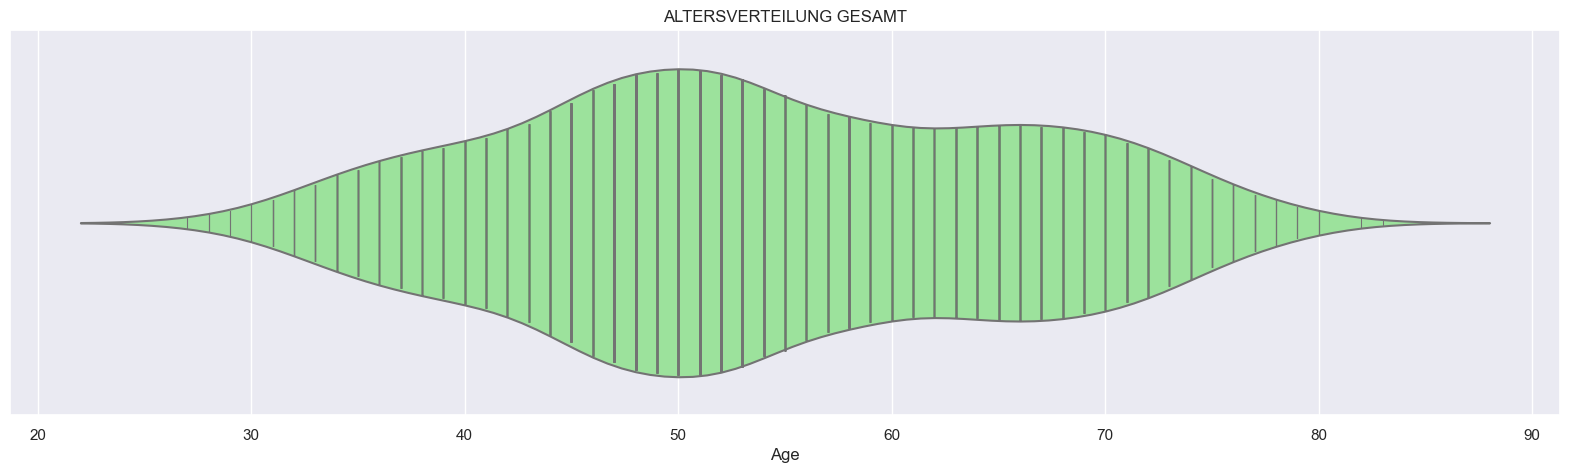

In [37]:
plt.figure(figsize=(20,5))

sns.violinplot(x=df["Age"],inner="stick", color = "lightgreen")
plt.xlabel("Age")
plt.title("ALTERSVERTEILUNG GESAMT")

Text(0.5, 1.0, 'ALTERSVERTEILUNG IN VERBINDUNG MIT DEM LABEL')

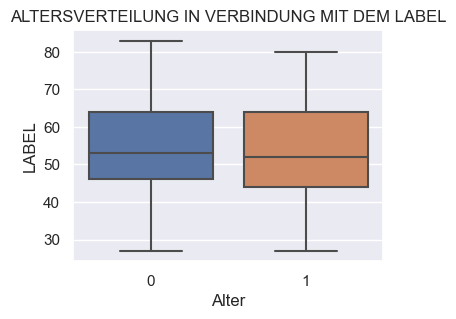

In [39]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_visual, x="Response", y="Age")
plt.xlabel("Alter")
plt.ylabel("LABEL")
plt.title("ALTERSVERTEILUNG IN VERBINDUNG MIT DEM LABEL")

Text(0.5, 1.0, 'EINKOMMEN UND LABEL')

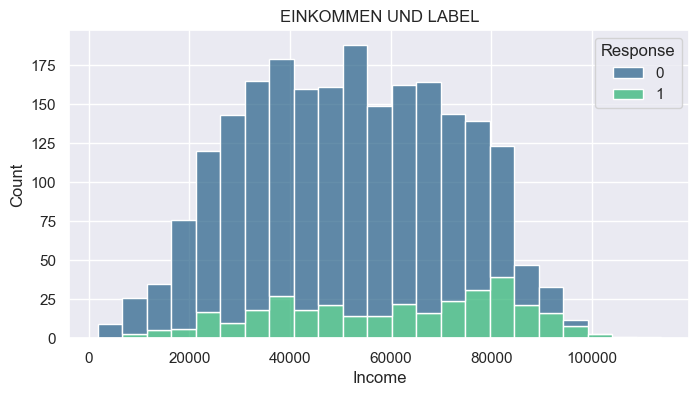

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_visual, x="Income", hue="Response", multiple="stack", palette="viridis")
plt.xlabel("Income")
plt.title("EINKOMMEN UND LABEL")

Text(0.5, 1.0, 'Web')

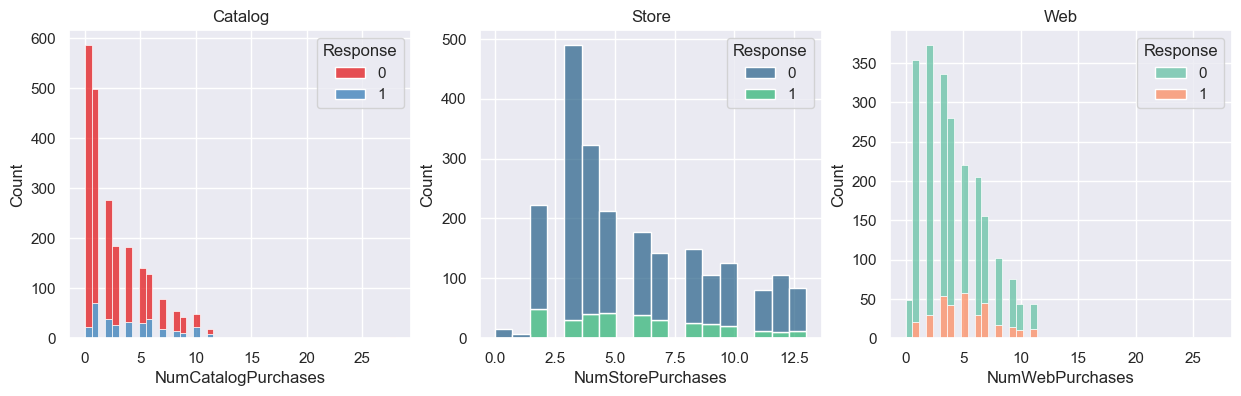

In [49]:
fig, axes = plt.subplots(1, 3,  figsize=(15, 4))

sns.histplot(data=df_visual, x="NumCatalogPurchases", hue="Response", multiple="stack", palette="Set1",ax=axes[0])
axes[0].set_title("Catalog")
sns.histplot(data=df_visual, x="NumStorePurchases", hue="Response", multiple="stack", palette="viridis", ax=axes[1])
axes[1].set_title('Store')
sns.histplot(data=df_visual, x="NumWebPurchases", hue="Response", multiple="stack", palette="Set2", ax=axes[2])
axes[2].set_title('Web')


Text(0.5, 1.0, 'DIFFERENT PURCHASES')

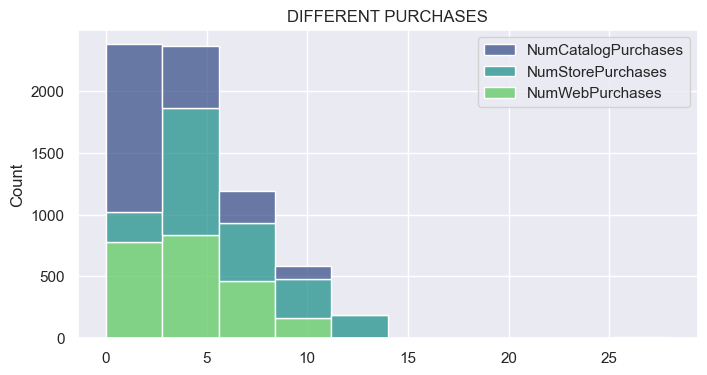

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_visual[["NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases"]], 
             multiple="stack", palette="viridis", bins = 10)
plt.title("DIFFERENT PURCHASES")

Text(0.5, 1.0, 'ACCEPTS')

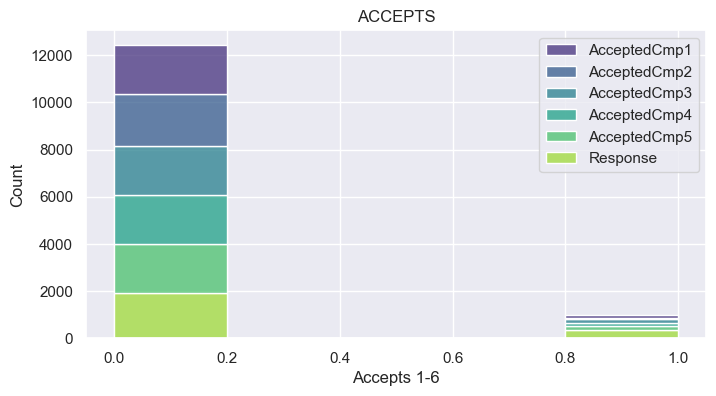

In [110]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_visual[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
              "AcceptedCmp5", "Response"]], multiple="stack", palette="viridis", bins = 5)
plt.xlabel("Accepts 1-6")
plt.title("ACCEPTS")

Text(0.5, 1.0, 'NUMERIC ACCEPTS BY CUSTOMER')

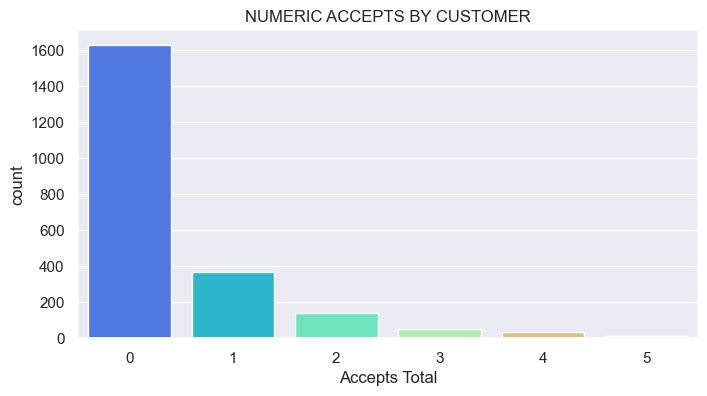

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_visual, x= "AcceptedCmp_Total", palette="rainbow")
plt.xlabel("Accepts Total")
plt.title("NUMERIC ACCEPTS BY CUSTOMER")

# PCA

In [50]:
df.shape

(2240, 26)

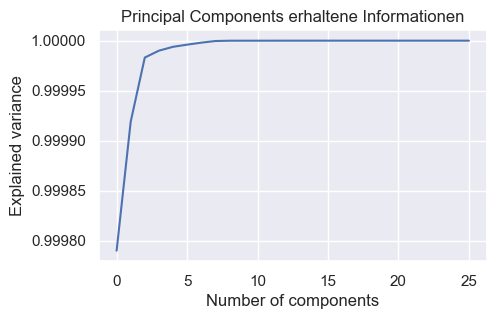

In [51]:
# Erhaltene Information in Abhängigkeit der Principal Components überprüfen:

from sklearn.decomposition import PCA

plt.figure(figsize=(5, 3)) 

pca_check = PCA(n_components=26, random_state = 33)            
pca_check.fit(df)                                             
plt.plot(np.cumsum(pca_check.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Principal Components erhaltene Informationen")
plt.show()

In [52]:
#Erste Komponente  enthält nahezu 100 % der Informationen

for i,value in enumerate(pca_check.explained_variance_ratio_):
    print(f"{i+1}. Principal Component erklärt {value*100:.4f}% der Varianz ")

1. Principal Component erklärt 99.9790% der Varianz 
2. Principal Component erklärt 0.0129% der Varianz 
3. Principal Component erklärt 0.0064% der Varianz 
4. Principal Component erklärt 0.0007% der Varianz 
5. Principal Component erklärt 0.0004% der Varianz 
6. Principal Component erklärt 0.0002% der Varianz 
7. Principal Component erklärt 0.0002% der Varianz 
8. Principal Component erklärt 0.0002% der Varianz 
9. Principal Component erklärt 0.0000% der Varianz 
10. Principal Component erklärt 0.0000% der Varianz 
11. Principal Component erklärt 0.0000% der Varianz 
12. Principal Component erklärt 0.0000% der Varianz 
13. Principal Component erklärt 0.0000% der Varianz 
14. Principal Component erklärt 0.0000% der Varianz 
15. Principal Component erklärt 0.0000% der Varianz 
16. Principal Component erklärt 0.0000% der Varianz 
17. Principal Component erklärt 0.0000% der Varianz 
18. Principal Component erklärt 0.0000% der Varianz 
19. Principal Component erklärt 0.0000% der Varianz 
2

In [53]:

X = df.drop(["AcceptedCmp_Total", "Response"], axis  = 1)


In [54]:
X.shape

(2240, 24)

In [55]:
#Standardscaler:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [56]:
# PCA mit 2 Komponenten

pca = PCA(n_components=2, random_state=33)

In [57]:
# PCA: trainieren und transformieren:

x_pca = pca.fit_transform(scaled_X)

x_pca.shape


(2240, 2)

In [121]:
# Dataframe mit pca.components_

df_pastpca = pd.DataFrame(pca.components_, columns = df.columns.drop(["Response", "AcceptedCmp_Total"]))
df_pastpca

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
0,0.01,-5.36e-03,0.34,-0.25,-0.05,5.23e-03,0.3,0.26,0.31,0.27,0.27,0.22,-0.06,0.21,3.13e-01,0.29,-0.25,0.01,0.09,0.19,0.17,0.06,-0.02,0.06
1,0.22,7.52e-02,0.09,-0.08,0.52,5.11e-03,0.2,-0.15,-0.14,-0.16,-0.14,0.05,0.43,0.33,9.67e-03,0.18,0.19,-0.05,0.19,-0.09,-0.07,0.07,-0.02,0.35


Text(0.5, 1.0, 'Gewichtungen Principal Components')

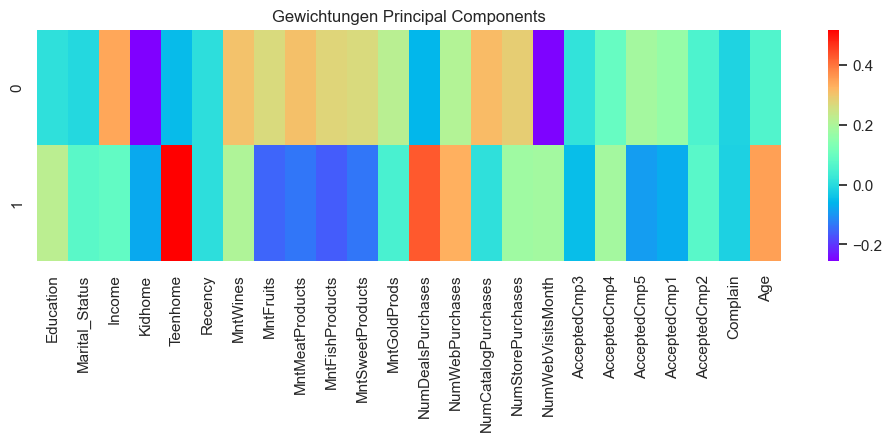

In [122]:
# Visualisierung einzelner features zu unterschiedlichen Gewichtungen mit max. Informationen

plt.figure(figsize=(12, 3))             
sns.heatmap(df_pastpca, cmap="rainbow")
plt.title("Gewichtungen Principal Components")

# SUPERVISED LEARNING

In [123]:
# alle features mit Label "Response" - X01

# alle features - X01 mit Label "Response"

In [58]:
X01 = x_pca
y01 = df["Response"]

In [59]:
X01.shape

(2240, 2)

In [60]:

from sklearn.model_selection import train_test_split

X01_train, X01_test, y01_train, y01_test = train_test_split(X01, y01, test_size = 0.20, random_state = 33)


In [61]:
# Algorithmen
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

log01 = LogisticRegression()
knc01 = KNeighborsClassifier()
svc01 = SVC()
nab01= GaussianNB()
rfc01 = RandomForestClassifier()

Text(0.5, 1.0, 'Ellbow method 01')

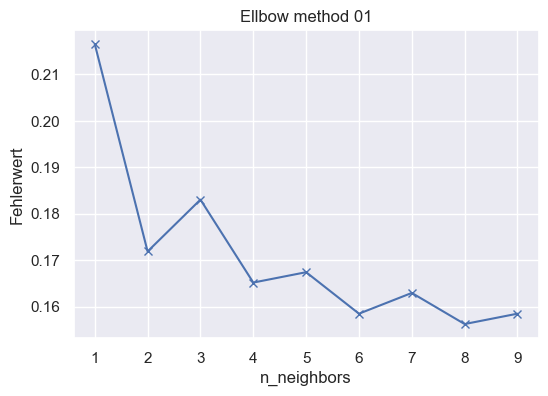

In [62]:
# Ellbow method für KNC

fehler01 = []

for k in range(1, 10):                                                    
    knc01 = KNeighborsClassifier(n_neighbors = k)        
    knc01.fit(X01_train, y01_train)
    predictions_k01 = knc01.predict(X01_test)
    fehler01.append(np.mean(predictions_k01 != y01_test))     

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), fehler01, marker = "x")     
plt.xlabel('n_neighbors')
plt.ylabel('Fehlerwert')
plt.title("Ellbow method 01")

In [63]:
# beste Parameter für SVC

from sklearn.model_selection import GridSearchCV

# dictionary mit Werten für C und gamma
hyperparameter = {"C" : [0.1, 1, 10, 100, 1000], "gamma" : [1, 0.1, 0.01, 0.001, 0.0001]}

grid01 = GridSearchCV(SVC(), hyperparameter, refit = True)
grid01.fit(X01_train, y01_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [64]:
grid01.best_params_

{'C': 10, 'gamma': 1}

In [65]:
#TRAINIEREN

log01 = LogisticRegression().fit(X01_train, y01_train)
knc01 = KNeighborsClassifier(n_neighbors = 4).fit(X01_train, y01_train) # bester Wert 4
svc01 = SVC(C=10, gamma=1).fit(X01_train, y01_train)
nab01 = GaussianNB().fit(X01_train, y01_train)
rfc01 = RandomForestClassifier(random_state = 33, n_estimators = 1000).fit(X01_train, y01_train)

In [66]:
#VORHERSAGEN

pred_log01 = log01.predict(X01_test)
pred_knc01 = knc01.predict(X01_test)
pred_svc01 = svc01.predict(X01_test)
pred_nab01 = nab01.predict(X01_test)
pred_rfc01 = rfc01.predict(X01_test)

In [67]:
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

In [69]:
#REPORTS
print("ALLE FEATURES PCA-REDUZIERT:\n")
print("Genauigkeit LogReg01: {:>12.2f}%".format((accuracy_score(y01_test, pred_log01)*100)))
print("Genauigkeit KNN01   : {:>12.2f}%".format((accuracy_score(y01_test, pred_knc01)*100)))   
print("Genauigkeit SVC01   : {:>12.2f}%".format((accuracy_score(y01_test, pred_svc01)*100)))                      
print("Genauigkeit NAIVE01 : {:>12.2f}%".format((accuracy_score(y01_test, pred_nab01)*100)))
print("Genauigkeit Random01: {:>12.2f}%\n".format((accuracy_score(y01_test, pred_rfc01)*100))) 

ALLE FEATURES PCA-REDUZIERT:

Genauigkeit LogReg01:        83.26%
Genauigkeit KNN01   :        83.48%
Genauigkeit SVC01   :        84.15%
Genauigkeit NAIVE01 :        83.71%
Genauigkeit Random01:        83.26%



Text(0.5, 1.0, 'RandomForest01')

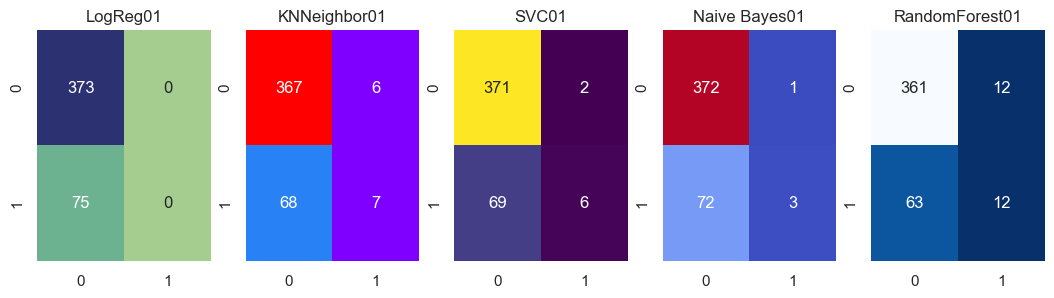

In [70]:
matrix_log01 = confusion_matrix(y01_test, pred_log01)
matrix_knc01 = confusion_matrix(y01_test, pred_knc01)
matrix_svc01 = confusion_matrix(y01_test, pred_svc01)
matrix_nab01 = confusion_matrix(y01_test, pred_nab01)
matrix_rfc01 = confusion_matrix(y01_test, pred_rfc01)

fig, axes = plt.subplots(1, 5, figsize=(13, 3))


sns.heatmap(matrix_log01, annot=True, cbar = False,  cmap="crest", fmt = ".0f", ax=axes[0])
axes[0].set_title("LogReg01")
sns.heatmap(matrix_knc01, annot=True, cbar = False,  cmap="rainbow", fmt = ".0f", ax=axes[1])
axes[1].set_title("KNNeighbor01")
sns.heatmap(matrix_svc01, annot=True, cbar = False,  cmap="viridis", fmt = ".0f", ax=axes[2])
axes[2].set_title("SVC01")
sns.heatmap(matrix_nab01, annot=True, cbar = False,  cmap="coolwarm", fmt = ".0f", ax=axes[3])
axes[3].set_title("Naive Bayes01")
sns.heatmap(matrix_rfc01, annot=True, cbar = False,  cmap="Blues_r", fmt = ".0f", ax=axes[4])
axes[4].set_title("RandomForest01")

In [71]:
df["Response"].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

# UNSUPERVISED LEARNING - K-MEANS - GESAMTER DATENSATZ

In [72]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Ellbow method K-Means')

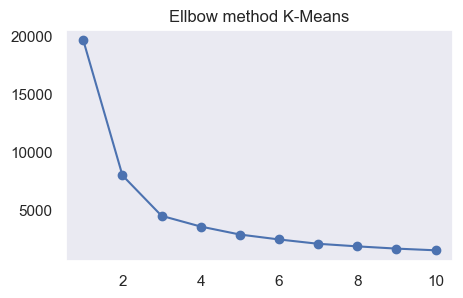

In [73]:
# ellbow method K-Means

kmeans_k = [KMeans(n_clusters=k, random_state=33).fit(x_pca) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_k]

plt.figure(figsize=(5, 3))
plt.grid()
plt.plot(range(1, 11), inertias, "bo-")               # Knick ist 2 oder 3
plt.title("Ellbow method K-Means")

In [74]:
#TRAINIEREN UND VORHERSAGE MIT 2 CLUSTERN:

km01 = KMeans(n_clusters=2, random_state=33)

pred_km01 = km01.fit_predict(x_pca)

In [75]:
# neues Label mit den vorhergesagten Clustern hinzufügen an mitarbeiter02

df["Label_K_means"] = pred_km01 

<Axes: xlabel='Income', ylabel='Marital_Status'>

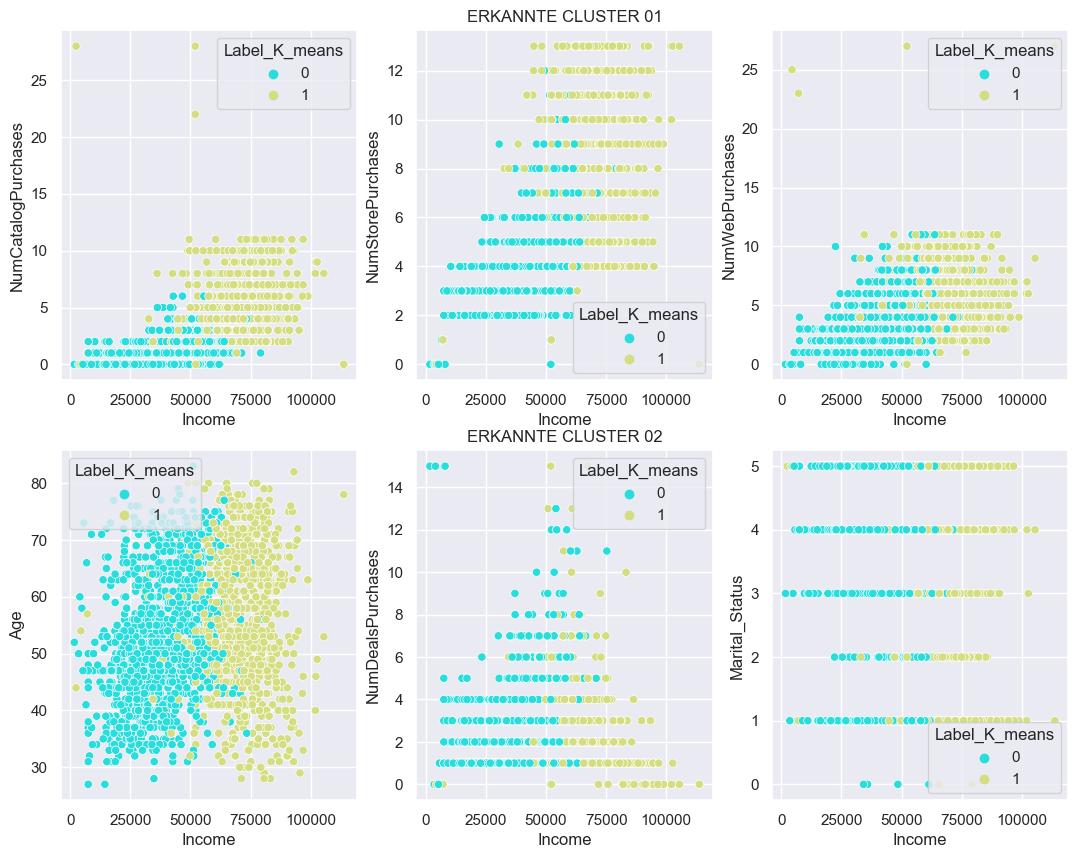

In [76]:
# Visualisierung Cluster mit verschiedenen features scatterplot

fig, axes = plt.subplots(2, 3,  figsize=(13, 10))

sns.scatterplot(data=df, x="Income", y="NumCatalogPurchases", hue="Label_K_means", ax=axes[0,0], palette="rainbow")

sns.scatterplot(data=df, x="Income", y="NumStorePurchases", hue="Label_K_means", ax=axes[0,1], palette="rainbow")
axes[0,1].set_title("ERKANNTE CLUSTER 01")

sns.scatterplot(data=df, x="Income", y="NumWebPurchases", hue="Label_K_means", ax=axes[0,2],palette="rainbow")

sns.scatterplot(data=df, x="Income", y="Age", hue="Label_K_means", ax=axes[1,0], palette="rainbow")

sns.scatterplot(data=df, x="Income", y="NumDealsPurchases", hue="Label_K_means", ax=axes[1,1],palette="rainbow")
axes[1,1].set_title("\nERKANNTE CLUSTER 02")

sns.scatterplot(data=df, x="Income", y="Marital_Status", hue="Label_K_means", ax=axes[1,2], palette="rainbow")

Text(0.5, 1.0, 'LABEL RESPONSE')

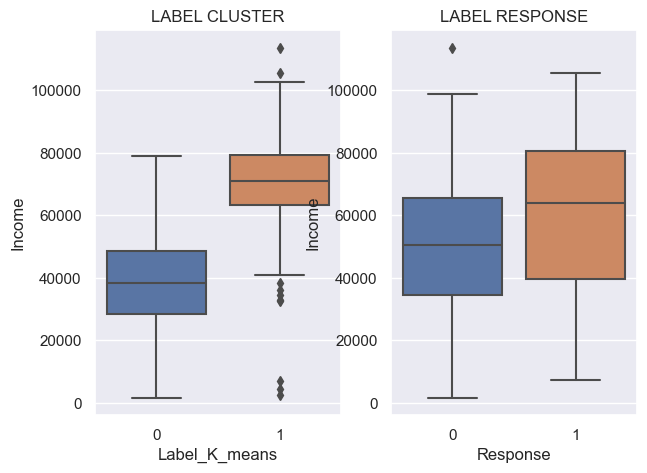

In [140]:
fig, axes = plt.subplots(1, 2,  figsize=(7, 5))

sns.boxplot(data=df, x="Label_K_means", y="Income", ax=axes[0])
axes[0].set_title("LABEL CLUSTER")

sns.boxplot(data=df, x="Response", y="Income", ax=axes[1])
axes[1].set_title("LABEL RESPONSE")

Text(0.5, 1.0, 'LABEL RESPONSE')

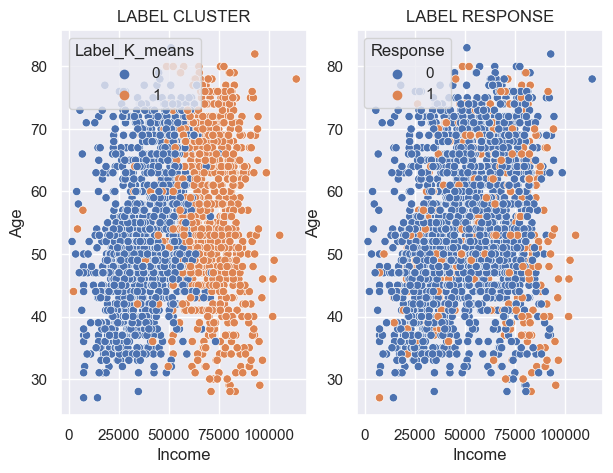

In [141]:
# Visualisierung Cluster Vergleich Label "Response" mit Label "Cluster"

fig, axes = plt.subplots(1, 2,  figsize=(7, 5))

sns.scatterplot(data=df, x="Income", y="Age", hue="Label_K_means", ax=axes[0])
axes[0].set_title("LABEL CLUSTER")

sns.scatterplot(data=df, x="Income", y="Age", hue="Response", ax=axes[1])
axes[1].set_title("LABEL RESPONSE")

Text(0.5, 1.0, 'VERTEILUNG CLUSTER')

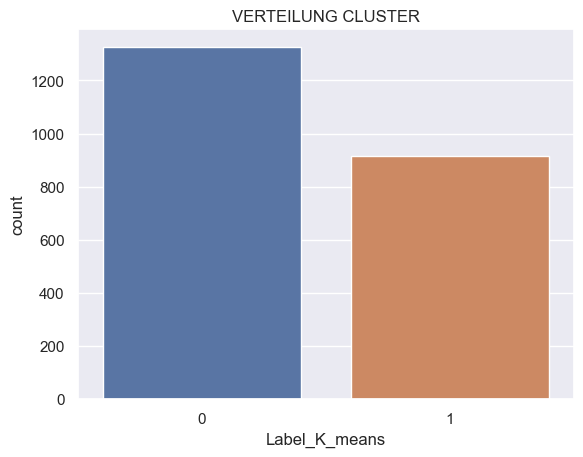

In [142]:
# Countplot Label_K_means

sns.countplot(x=df["Label_K_means"])
plt.title("VERTEILUNG CLUSTER")

Text(0.5, 1.0, 'VERTEILUNG RESPONSE')

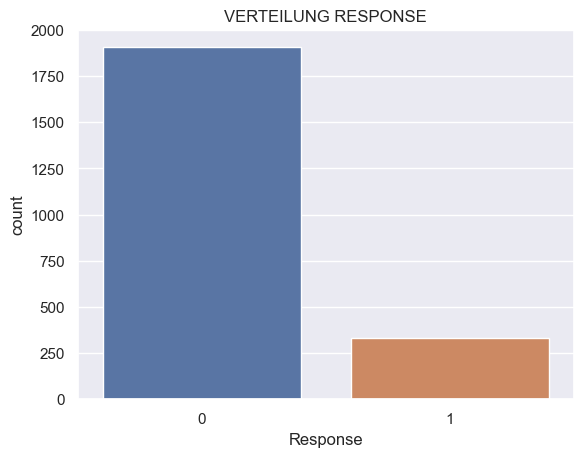

In [78]:
# Countplot Label_K_means

sns.countplot(x=df["Response"])
plt.title("VERTEILUNG RESPONSE")

<Axes: xlabel='NumCatalogPurchases', ylabel='Label_K_means'>

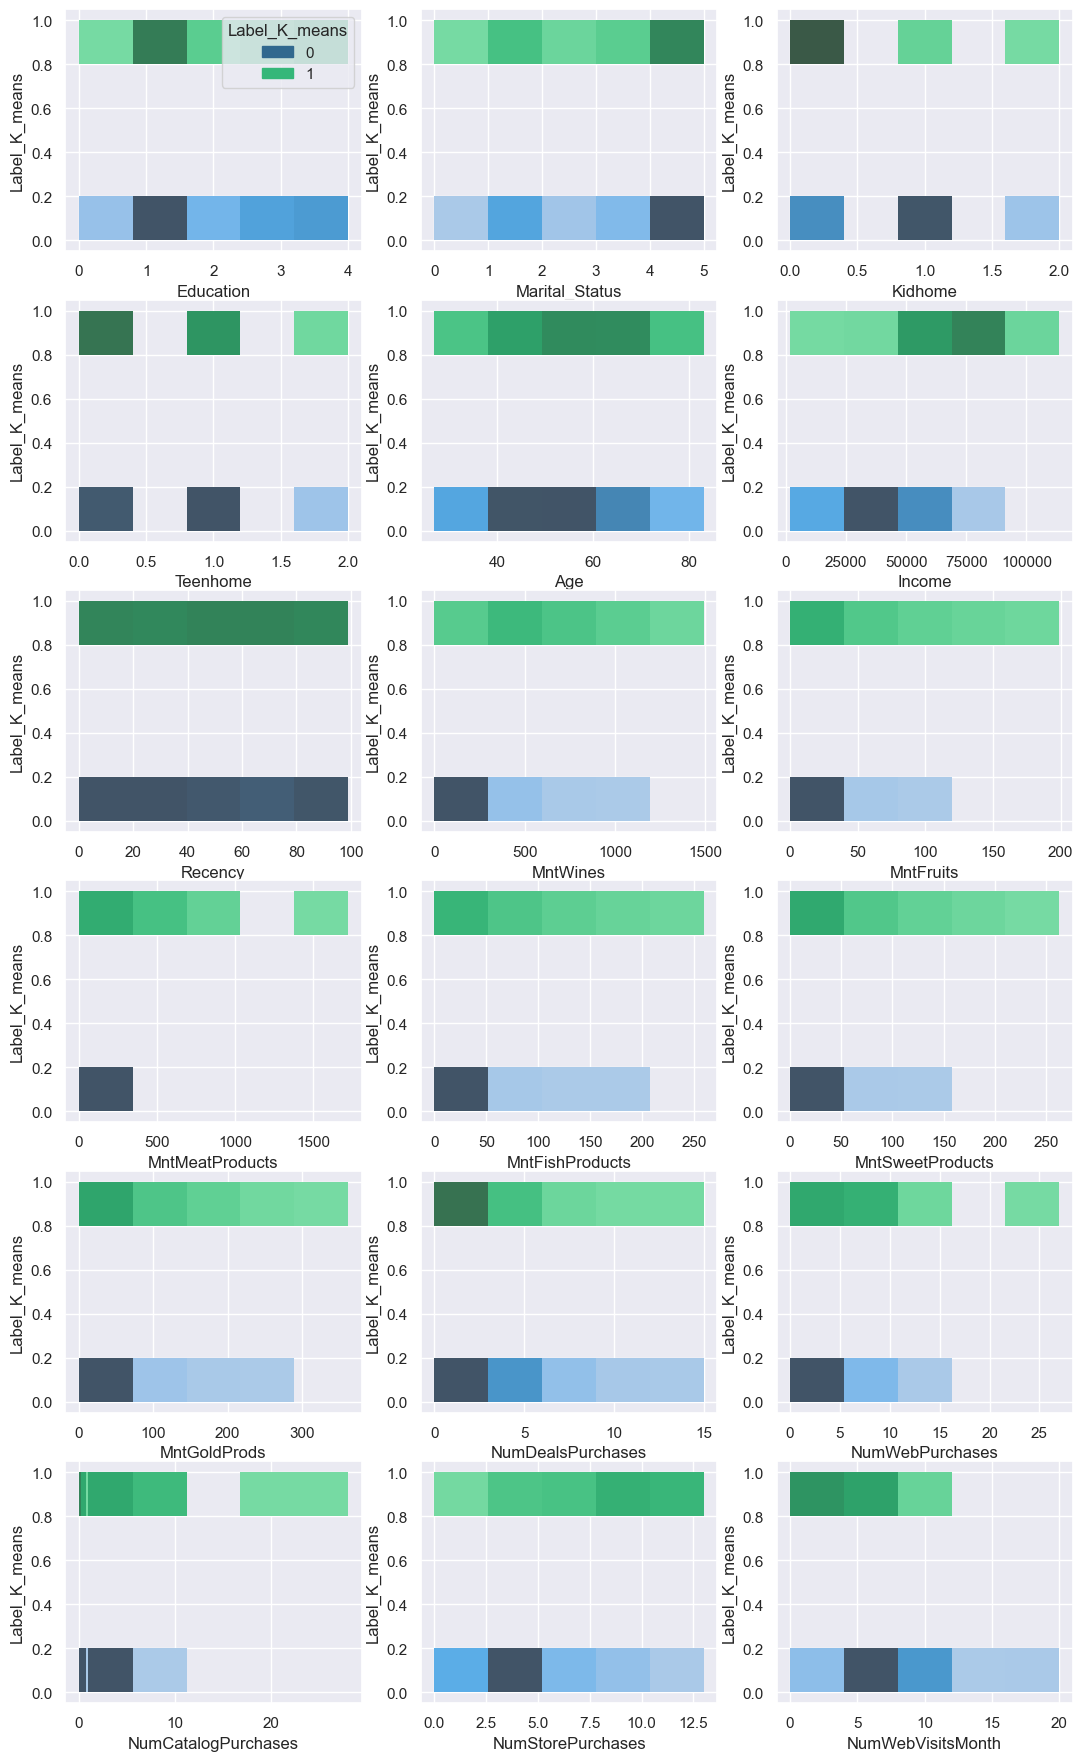

In [143]:
fig,axis = plt.subplots(6,3,figsize=(13,22))

sns.histplot(y=df["Label_K_means"],x=df["Education"], hue=df["Label_K_means"], palette="viridis",
             bins=5,ax=axis[0,0])
sns.histplot(y=df["Label_K_means"],x=df["Marital_Status"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[0,1],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["Kidhome"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[0,2],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["Teenhome"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[1,0],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["Age"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[1,1],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["Income"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[1,2],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["Recency"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[2,0],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["MntWines"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[2,1],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["MntFruits"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[2,2],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["MntMeatProducts"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[3,0],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["MntFishProducts"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[3,1],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["MntSweetProducts"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[3,2],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["MntGoldProds"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[4,0],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["NumDealsPurchases"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[4,1],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["NumWebPurchases"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[4,2],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["NumCatalogPurchases"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[5,0],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["NumStorePurchases"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[5,1],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["NumWebVisitsMonth"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[5,2],legend=False)
sns.histplot(y=df["Label_K_means"],x=df["Complain"], hue=df["Label_K_means"],palette="viridis",
             bins=5,ax=axis[5,0],legend=False)

In [144]:
# Vergleich Label "Response" mit Label "Cluster" 

print(classification_report(df["Response"], pred_km01))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1906
           1       0.23      0.62      0.33       334

    accuracy                           0.63      2240
   macro avg       0.56      0.62      0.54      2240
weighted avg       0.80      0.63      0.68      2240



In [145]:
x_pca[::,0], x_pca[::,1]

(array([ 3.50524777, -2.30855695,  1.75782136, ...,  1.53861815,
         1.90582213, -1.88111889]),
 array([-0.50289265,  0.00449599, -0.27963256, ..., -0.04605031,
         1.29372198,  1.48317365]))

<Axes: >

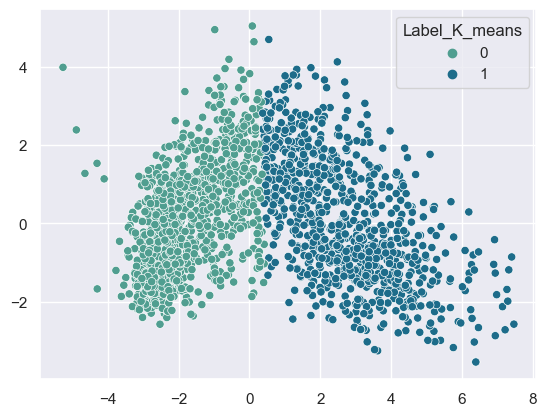

In [148]:
sns.scatterplot(data=df, x=x_pca[::,0], y=x_pca[::,1], hue="Label_K_means", palette="crest")

In [ ]:
#AcceptedCmp1 – 1, wenn der Kunde das Angebot in der 1. Kampagne angenommen hat, 0 sonst
#AcceptedCmp2 – 1, wenn der Kunde das Angebot in der 2. Kampagne angenommen hat, 0 sonst
#AcceptedCmp3 – 1, wenn der Kunde das Angebot in der 3. Kampagne angenommen hat, 0 sonst
#AcceptedCmp4 – 1, wenn der Kunde hat das Angebot in der 4. Kampagne angenommen, 0 sonst
#AcceptedCmp5 – 1, wenn der Kunde das Angebot in der 5. Kampagne angenommen hat, sonst 0
#Response (Ziel) – 1, wenn der Kunde das Angebot in der letzten Kampagne angenommen hat, 0 sonst
#Complain – 1, wenn der Kunde sich beschwert hat die letzten 2 Jahre
#DtCustomer – Datum der Anmeldung des Kunden beim Unternehmen.
#Eduction – Bildungsniveau des Kunden.
#Marital – Familienstand des Kunden
#Kidhome – Anzahl der kleinen Kinder im Haushalt des Kunden
#Teenhome – Anzahl der Teenager im Haushalt des Kunden
#Income – jährliches Haushaltseinkommen des Kunden
#MntFishProducts – Betrag, der in den letzten 2 Jahren für Fischprodukte ausgegeben wurde
#MntMeatProducts – Betrag, der in den letzten 2 Jahren für Fleischprodukte ausgegeben wurde
#MntFruits – Betrag Ausgaben für Fruchtprodukte in den letzten 2 Jahren
#MntSweetProducts – Betrag, der in den letzten 2 Jahren für süße Produkte ausgegeben wurde
#MntWines – Betrag, der in den letzten 2 Jahren für Weinprodukte ausgegeben wurde
#MntGoldProds – Betrag, der in den letzten 2 Jahren für Goldprodukte ausgegeben wurde
#NumDealsPurchases – Anzahl der Käufe mit Rabatt getätigt
#NumCatalogPurchases – Anzahl der über den Katalog getätigten Käufe
#NumStorePurchases – Anzahl der direkt in Geschäften getätigten Einkäufe
#NumWebPurchases – Anzahl der über die Website des Unternehmens getätigten Einkäufe
#NumWebVisitsMonth – Anzahl der Besuche auf der Website des Unternehmens im letzten Monat
#Recency – Anzahl der Tage seit dem letzten Kauf